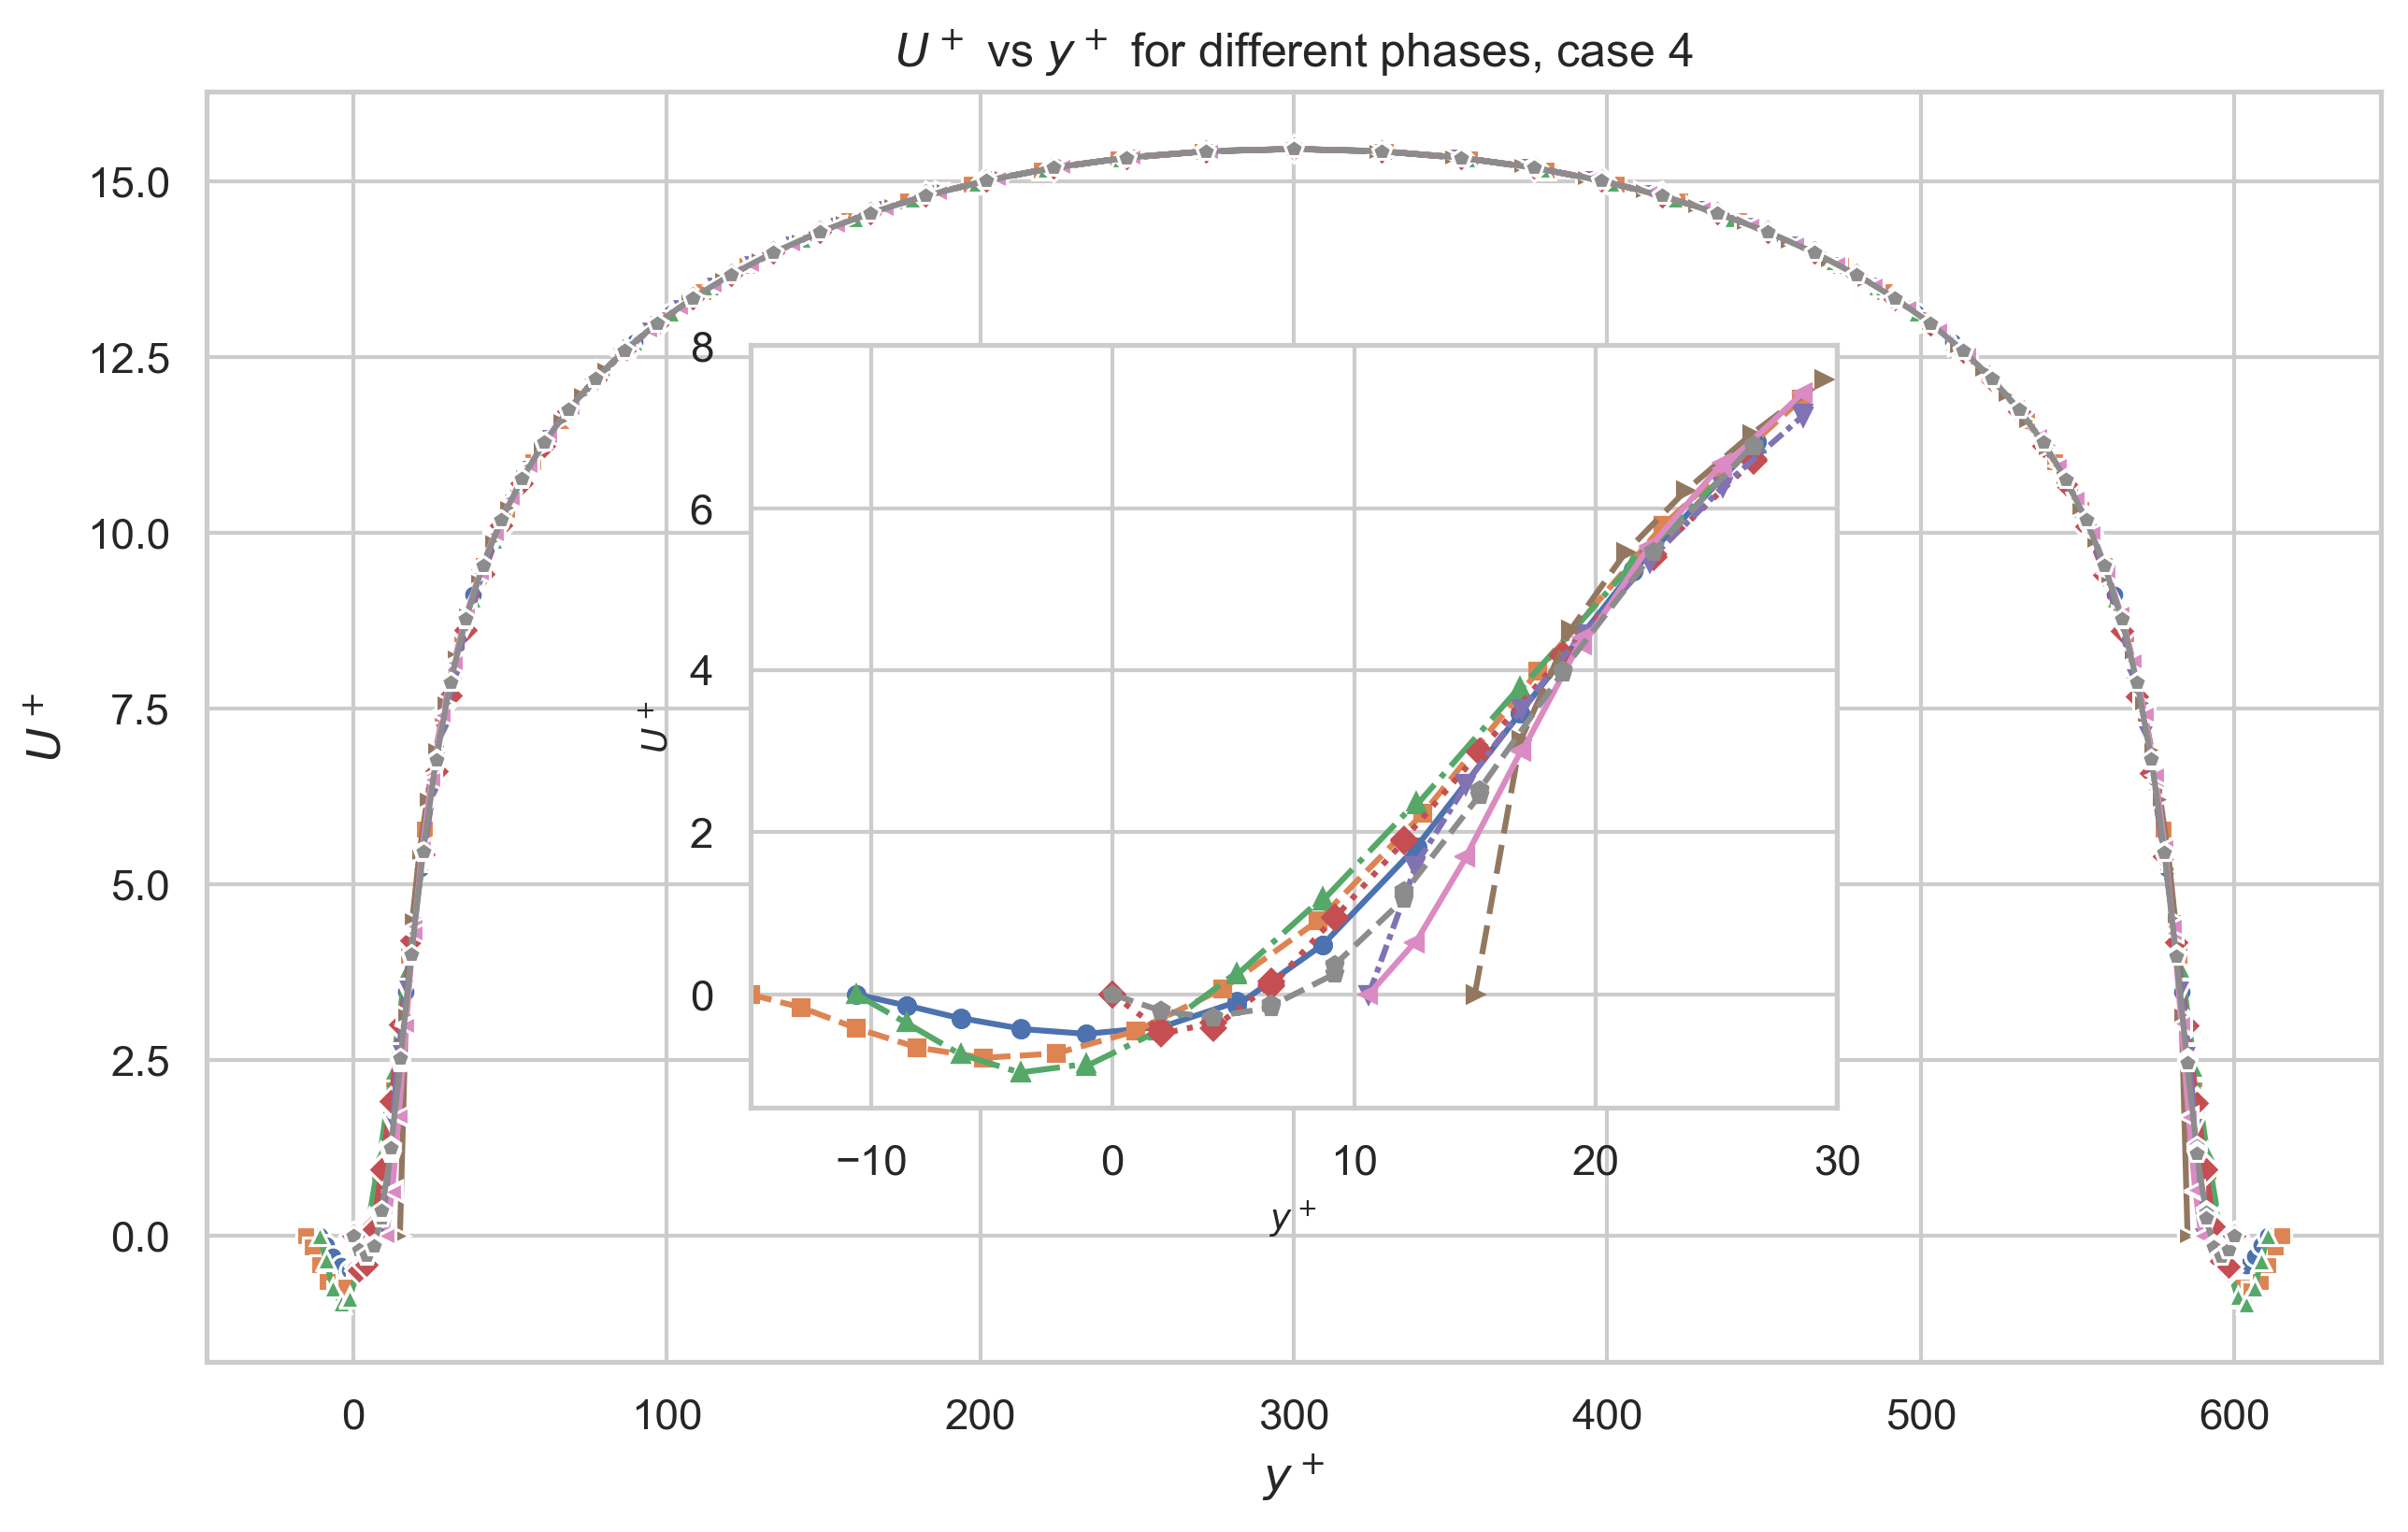

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fractions import Fraction
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sns.set(style='whitegrid')

sim_num = 4
pi_divs = [4, 2, 1.3333333333333333,1 ,0.8 , 0.6666666666666666, 0.5714285714285714,0.5]

linestyles = ['-', '--', '-.', ':', (0,(3,1,1,1)), (0,(5,2)), '-', '--']
markers    = ['o', 's', '^', 'D', 'v', '>', '<', 'p']

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

handles, labels = [], []
all_zoom_xmins = []
all_zoom_ymins = []
all_zoom_ymaxs = []

for i, pi_div in enumerate(pi_divs):
    path = f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/csv/avg_profile_sim_{sim_num}_phase_piby{pi_div}.csv'
    df = pd.read_csv(path).dropna(subset=['y_plus','U_plus']).sort_values('y_plus')

    # pretty phase label: e.g., 4π/3, 2π, π/2, etc.
    frac = Fraction(1/pi_div).limit_denominator()
    if frac.denominator == 1:
        label = rf"${frac.numerator}\pi$"
    else:
        label = rf"$\frac{{{frac.numerator}\pi}}{{{frac.denominator}}}$"

    ln = sns.lineplot(
        ax=ax, data=df, x='y_plus', y='U_plus',
        legend=False,                               # ← no legend on main plot
        linestyle=linestyles[i % len(linestyles)],
        marker=markers[i % len(markers)], markersize=5
    )
    handles.append(ln.lines[-1])
    labels.append(label)

    # gather zoom stats for y+<30
    z = df[df['y_plus'] < 30]
    if not z.empty:
        all_zoom_xmins.append(z['y_plus'].min())
        all_zoom_ymins.append(z['U_plus'].min())
        all_zoom_ymaxs.append(z['U_plus'].max())

# ----- inset: zoom region -----
axins = inset_axes(ax, width="50%", height="60%", loc='center', borderpad=3)

for i, pi_div in enumerate(pi_divs):
    df = pd.read_csv(
        f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/csv/avg_profile_sim_{sim_num}_phase_piby{pi_div}.csv'
    ).dropna(subset=['y_plus','U_plus']).sort_values('y_plus')
    z = df[df['y_plus'] < 30]
    axins.plot(
        z['y_plus'], z['U_plus'],
        linestyle=linestyles[i % len(linestyles)],
        marker=markers[i % len(markers)], markersize=4
    )

# use real mins/maxs from data for nicer limits
xmin = min(all_zoom_xmins) if all_zoom_xmins else 0
ymin = min(all_zoom_ymins) if all_zoom_ymins else None
ymax = max(all_zoom_ymaxs) if all_zoom_ymaxs else None

axins.set_xlim(xmin, 30)
if ymin is not None and ymax is not None:
    pad = 0.05*(ymax - ymin if ymax>ymin else 1.0)
    axins.set_ylim(ymin - pad, ymax + pad)
axins.set_xlabel(r'$y^+$', fontsize=9)
axins.set_ylabel(r'$U^+$', fontsize=9)
axins.grid(True)

# main axes styling
ax.set_title(r'$U^+$ vs $y^+$ for different phases, case {}'.format(sim_num))
ax.set_xlabel(r'$y^+$'); ax.set_ylabel(r'$U^+$'); ax.grid(True)

plt.savefig(f'u+_vs_y+_phases_sim{sim_num}_with_inset.png', bbox_inches='tight', dpi=300)
plt.show()

# ----- separate legend figure (a “table-like” legend) -----
fig_leg = plt.figure(figsize=(3.2, 0.42*len(labels)+0.6), dpi=300)
fig_leg.legend(handles, labels, loc='center', frameon=True, title='Phase', ncol=1)
fig_leg.savefig(f'legend_phases.png', bbox_inches='tight', dpi=300)
plt.close(fig_leg)
plt.show()

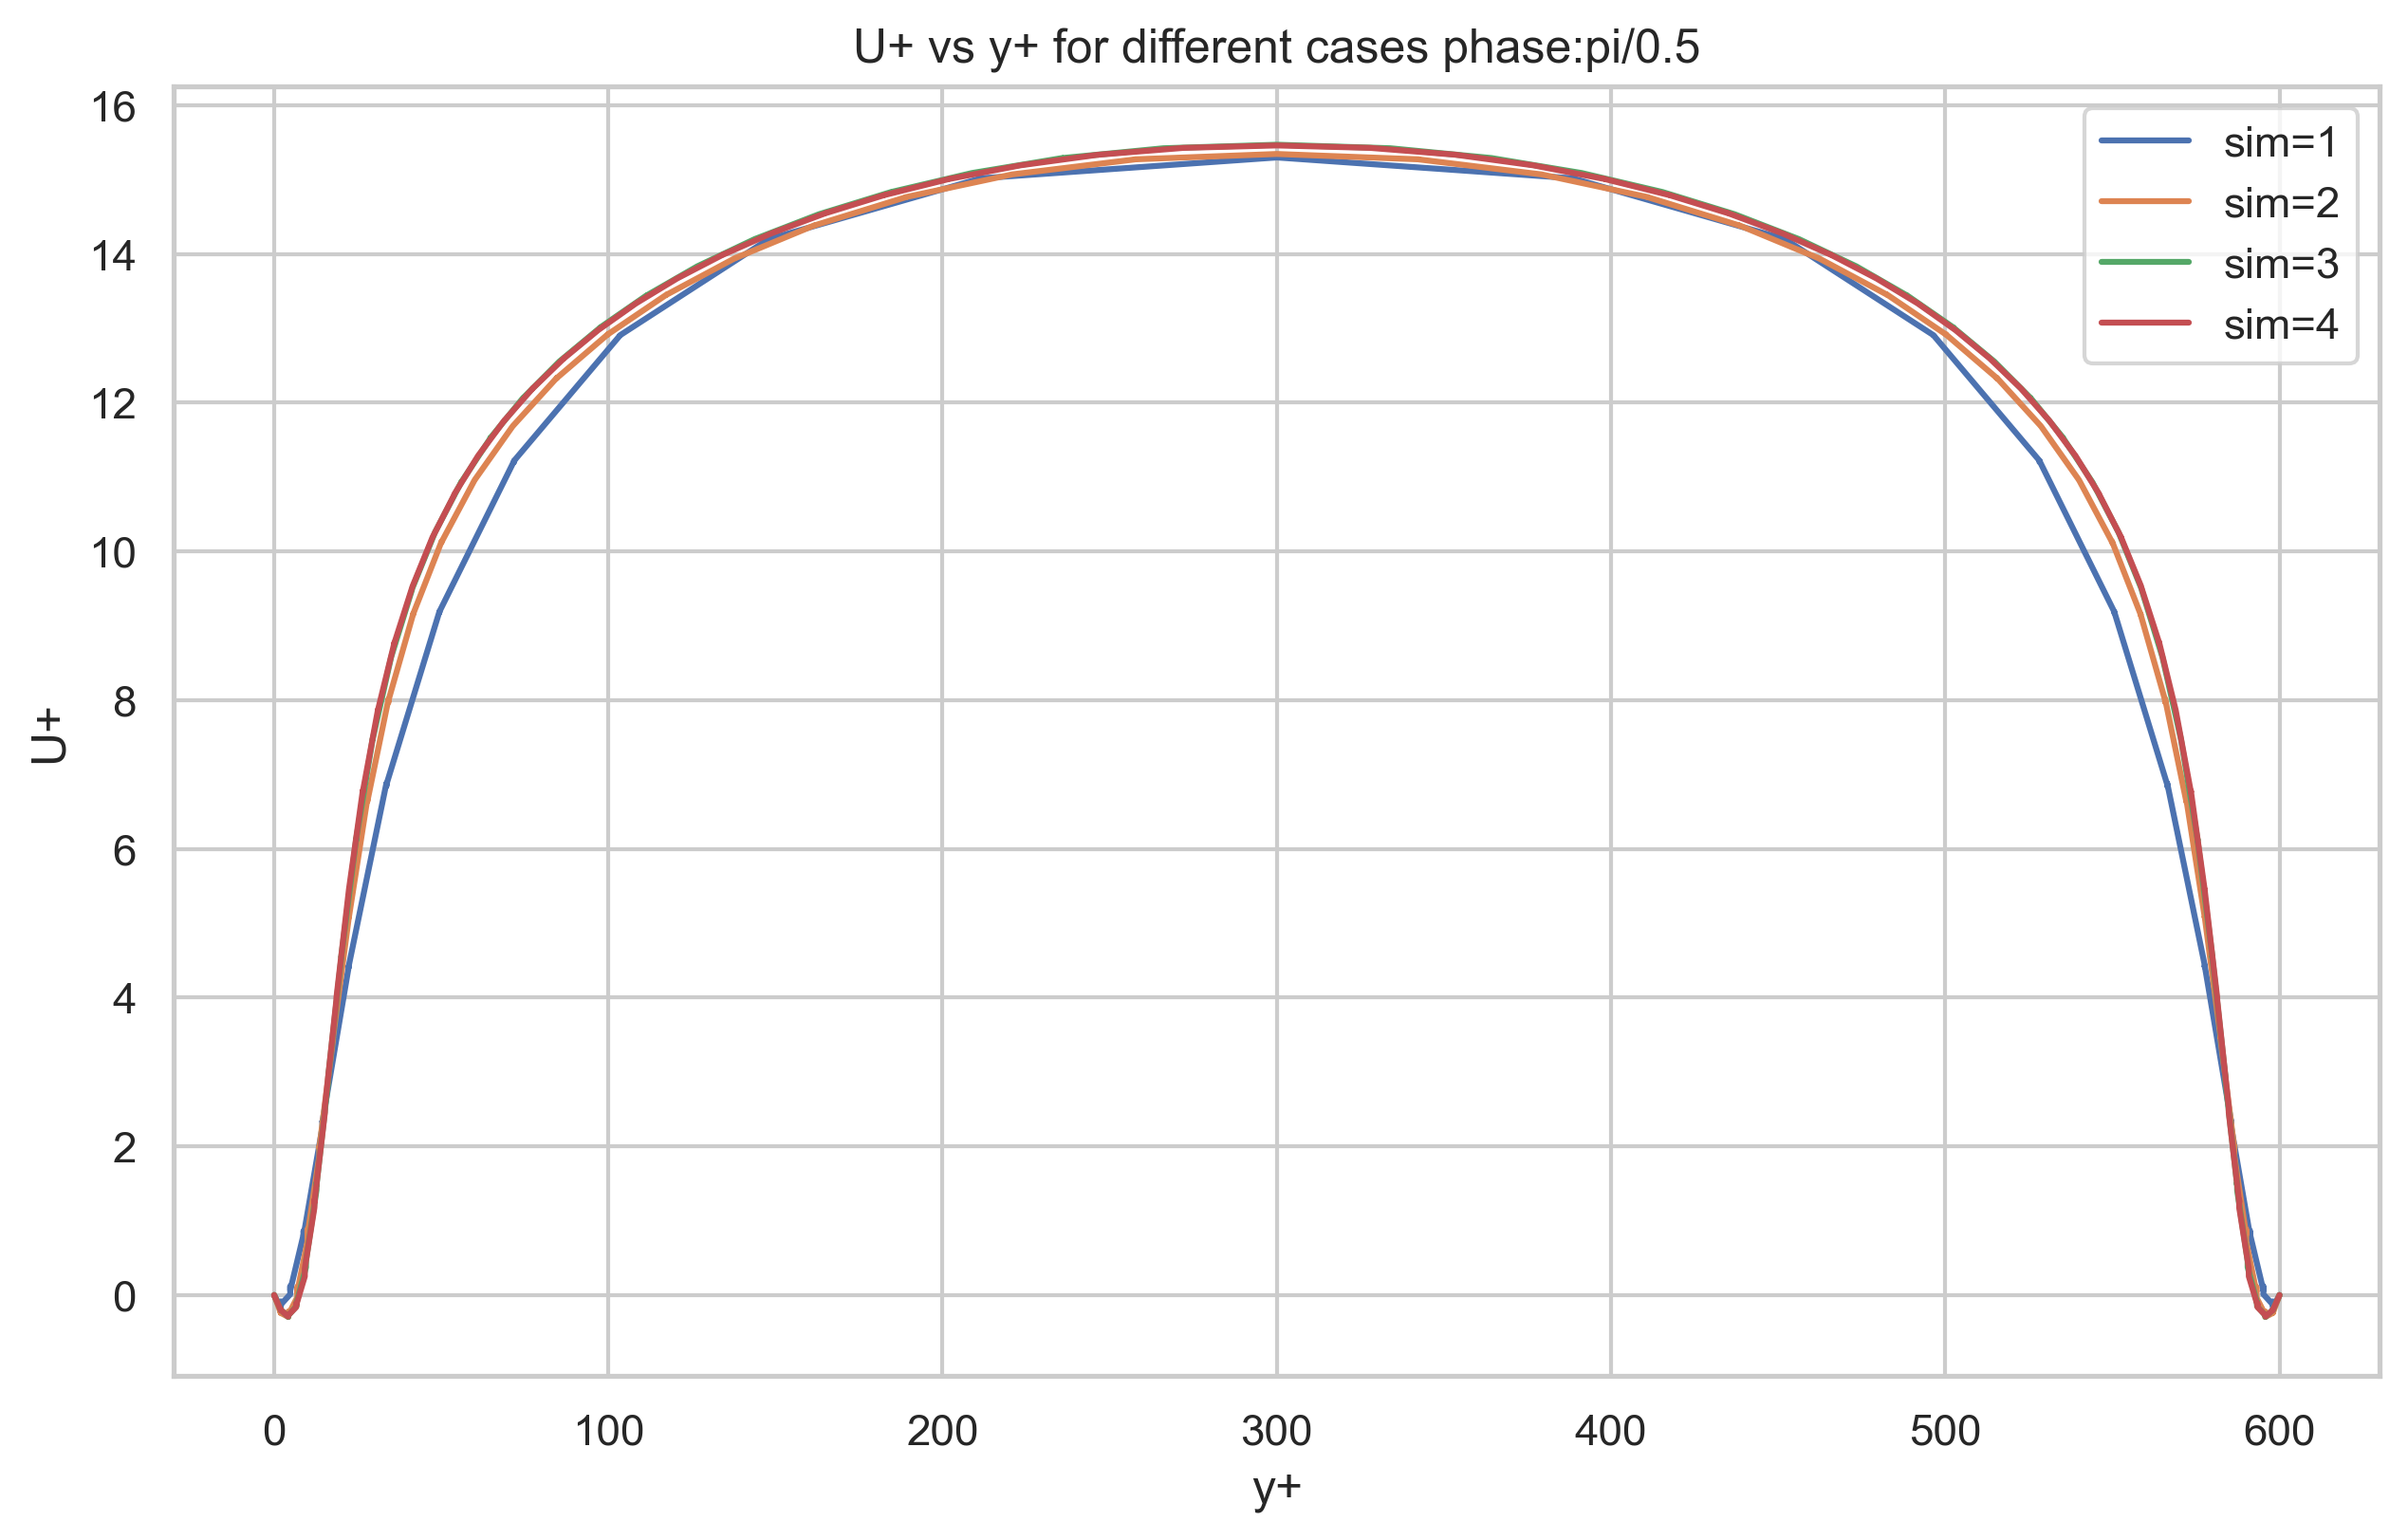

In [120]:
#plotting different phases from the same case
#change sim num 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6), dpi=300)

pi_div=0.5

for sim_num in [1,2,3,4 ]:  # replace with your parameter sweep
    df = pd.read_csv(f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/csv/avg_profile_sim_{sim_num}_phase_piby{pi_div}.csv')
    sns.lineplot(data=df, x='y_plus', y='U_plus', label=f'sim={sim_num}')

plt.title(f'U+ vs y+ for different cases phase:pi/{pi_div}')
plt.xlabel('y+')
plt.ylabel('U+')
plt.legend()
plt.grid(True)
plt.savefig(f'u+ vs y+ case comparison phase piby{pi_div}.png')
plt.show()


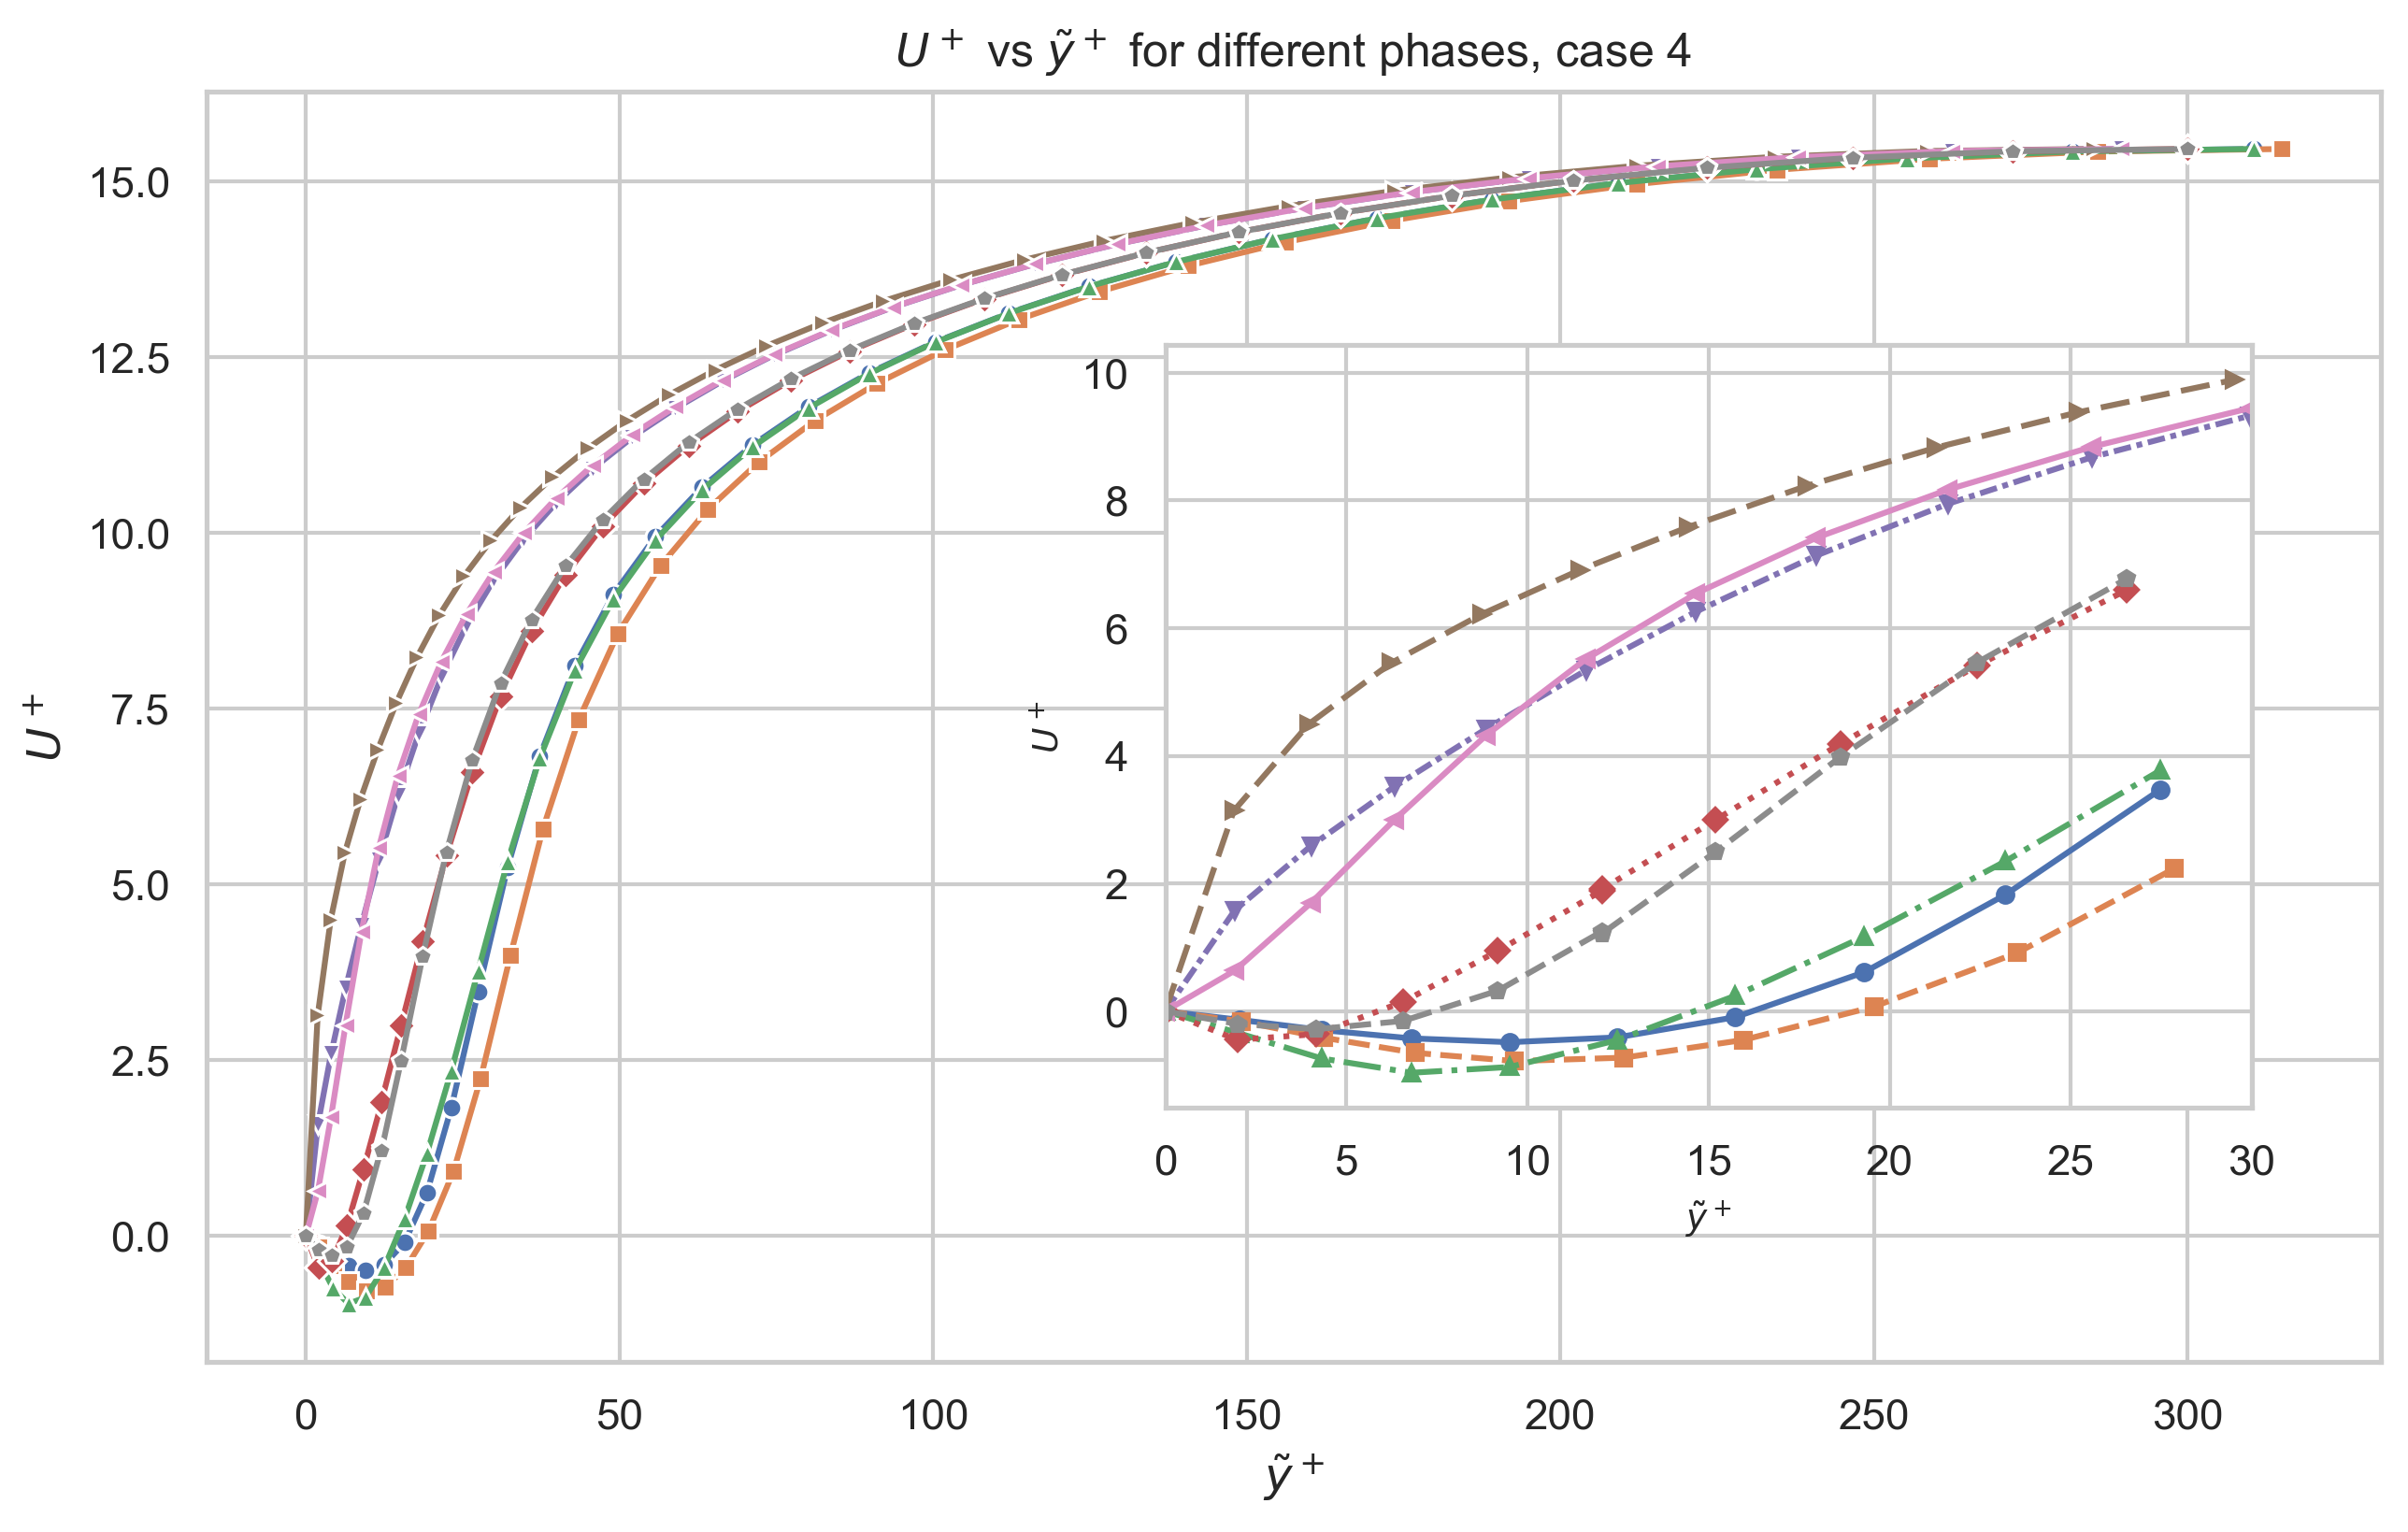

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fractions import Fraction
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# ---------- settings ----------
sns.set(style='whitegrid')
sim_num = 4
pi_divs = [4, 2, 1.3333333333333333, 1, 0.8, 0.6666666666666666, 0.5714285714285714, 0.5]

# distinct styles to help distinguish lines
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 2)), '-', '--']
markers    = ['o', 's', '^', 'D', 'v', '>', '<', 'p']

# ---------- main figure ----------
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

handles, labels = [], []
all_zoom_xmins, all_zoom_ymins, all_zoom_ymaxs = [], [], []

for i, pi_div in enumerate(pi_divs):
    path = f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/csv/avg_profile_wavy_sim_{sim_num}_phase_piby{pi_div}.csv'
    df = pd.read_csv(path).dropna(subset=['y_plus_wavy', 'U_plus']).sort_values('y_plus_wavy')

    
    ln = sns.lineplot(
        ax=ax, data=df, x='y_plus_wavy', y='U_plus',
        legend=False,
        linestyle=linestyles[i % len(linestyles)],
        marker=markers[i % len(markers)], markersize=5
    )
    handles.append(ln.lines[-1])
    labels.append(label)

    # collect stats for the inset (y_tilde+ < 30)
    z = df[df['y_plus_wavy'] < 30]
    if not z.empty:
        all_zoom_xmins.append(z['y_plus_wavy'].min())
        all_zoom_ymins.append(z['U_plus'].min())
        all_zoom_ymaxs.append(z['U_plus'].max())

# ---- inset: zoom for y_tilde+ < 30 ----
axins = inset_axes(ax, width="50%", height="60%", loc='center right', borderpad=3)

for i, pi_div in enumerate(pi_divs):
    df = pd.read_csv(
        f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/csv/avg_profile_wavy_sim_{sim_num}_phase_piby{pi_div}.csv'
    ).dropna(subset=['y_plus_wavy','U_plus']).sort_values('y_plus_wavy')
    z = df[df['y_plus_wavy'] < 30]
    if not z.empty:
        axins.plot(
            z['y_plus_wavy'], z['U_plus'],
            linestyle=linestyles[i % len(linestyles)],
            marker=markers[i % len(markers)], markersize=4
        )

# set inset limits based on actual data
xmin = min(all_zoom_xmins) if all_zoom_xmins else 0.0
axins.set_xlim(xmin, 30)

if all_zoom_ymins and all_zoom_ymaxs:
    ymin = min(all_zoom_ymins)
    ymax = max(all_zoom_ymaxs)
    pad = 0.05 * (ymax - ymin if ymax > ymin else 1.0)
    axins.set_ylim(ymin - pad, ymax + pad)

axins.set_xlabel(r'$\tilde{y}^+$', fontsize=9)
axins.set_ylabel(r'$U^+$', fontsize=9)
axins.grid(True)

# main axes cosmetics
ax.set_title(r'$U^+$ vs $\tilde{{y}}^+$ for different phases, case {}'.format(sim_num))
ax.set_xlabel(r'$\tilde{y}^+$')
ax.set_ylabel(r'$U^+$')
ax.grid(True)







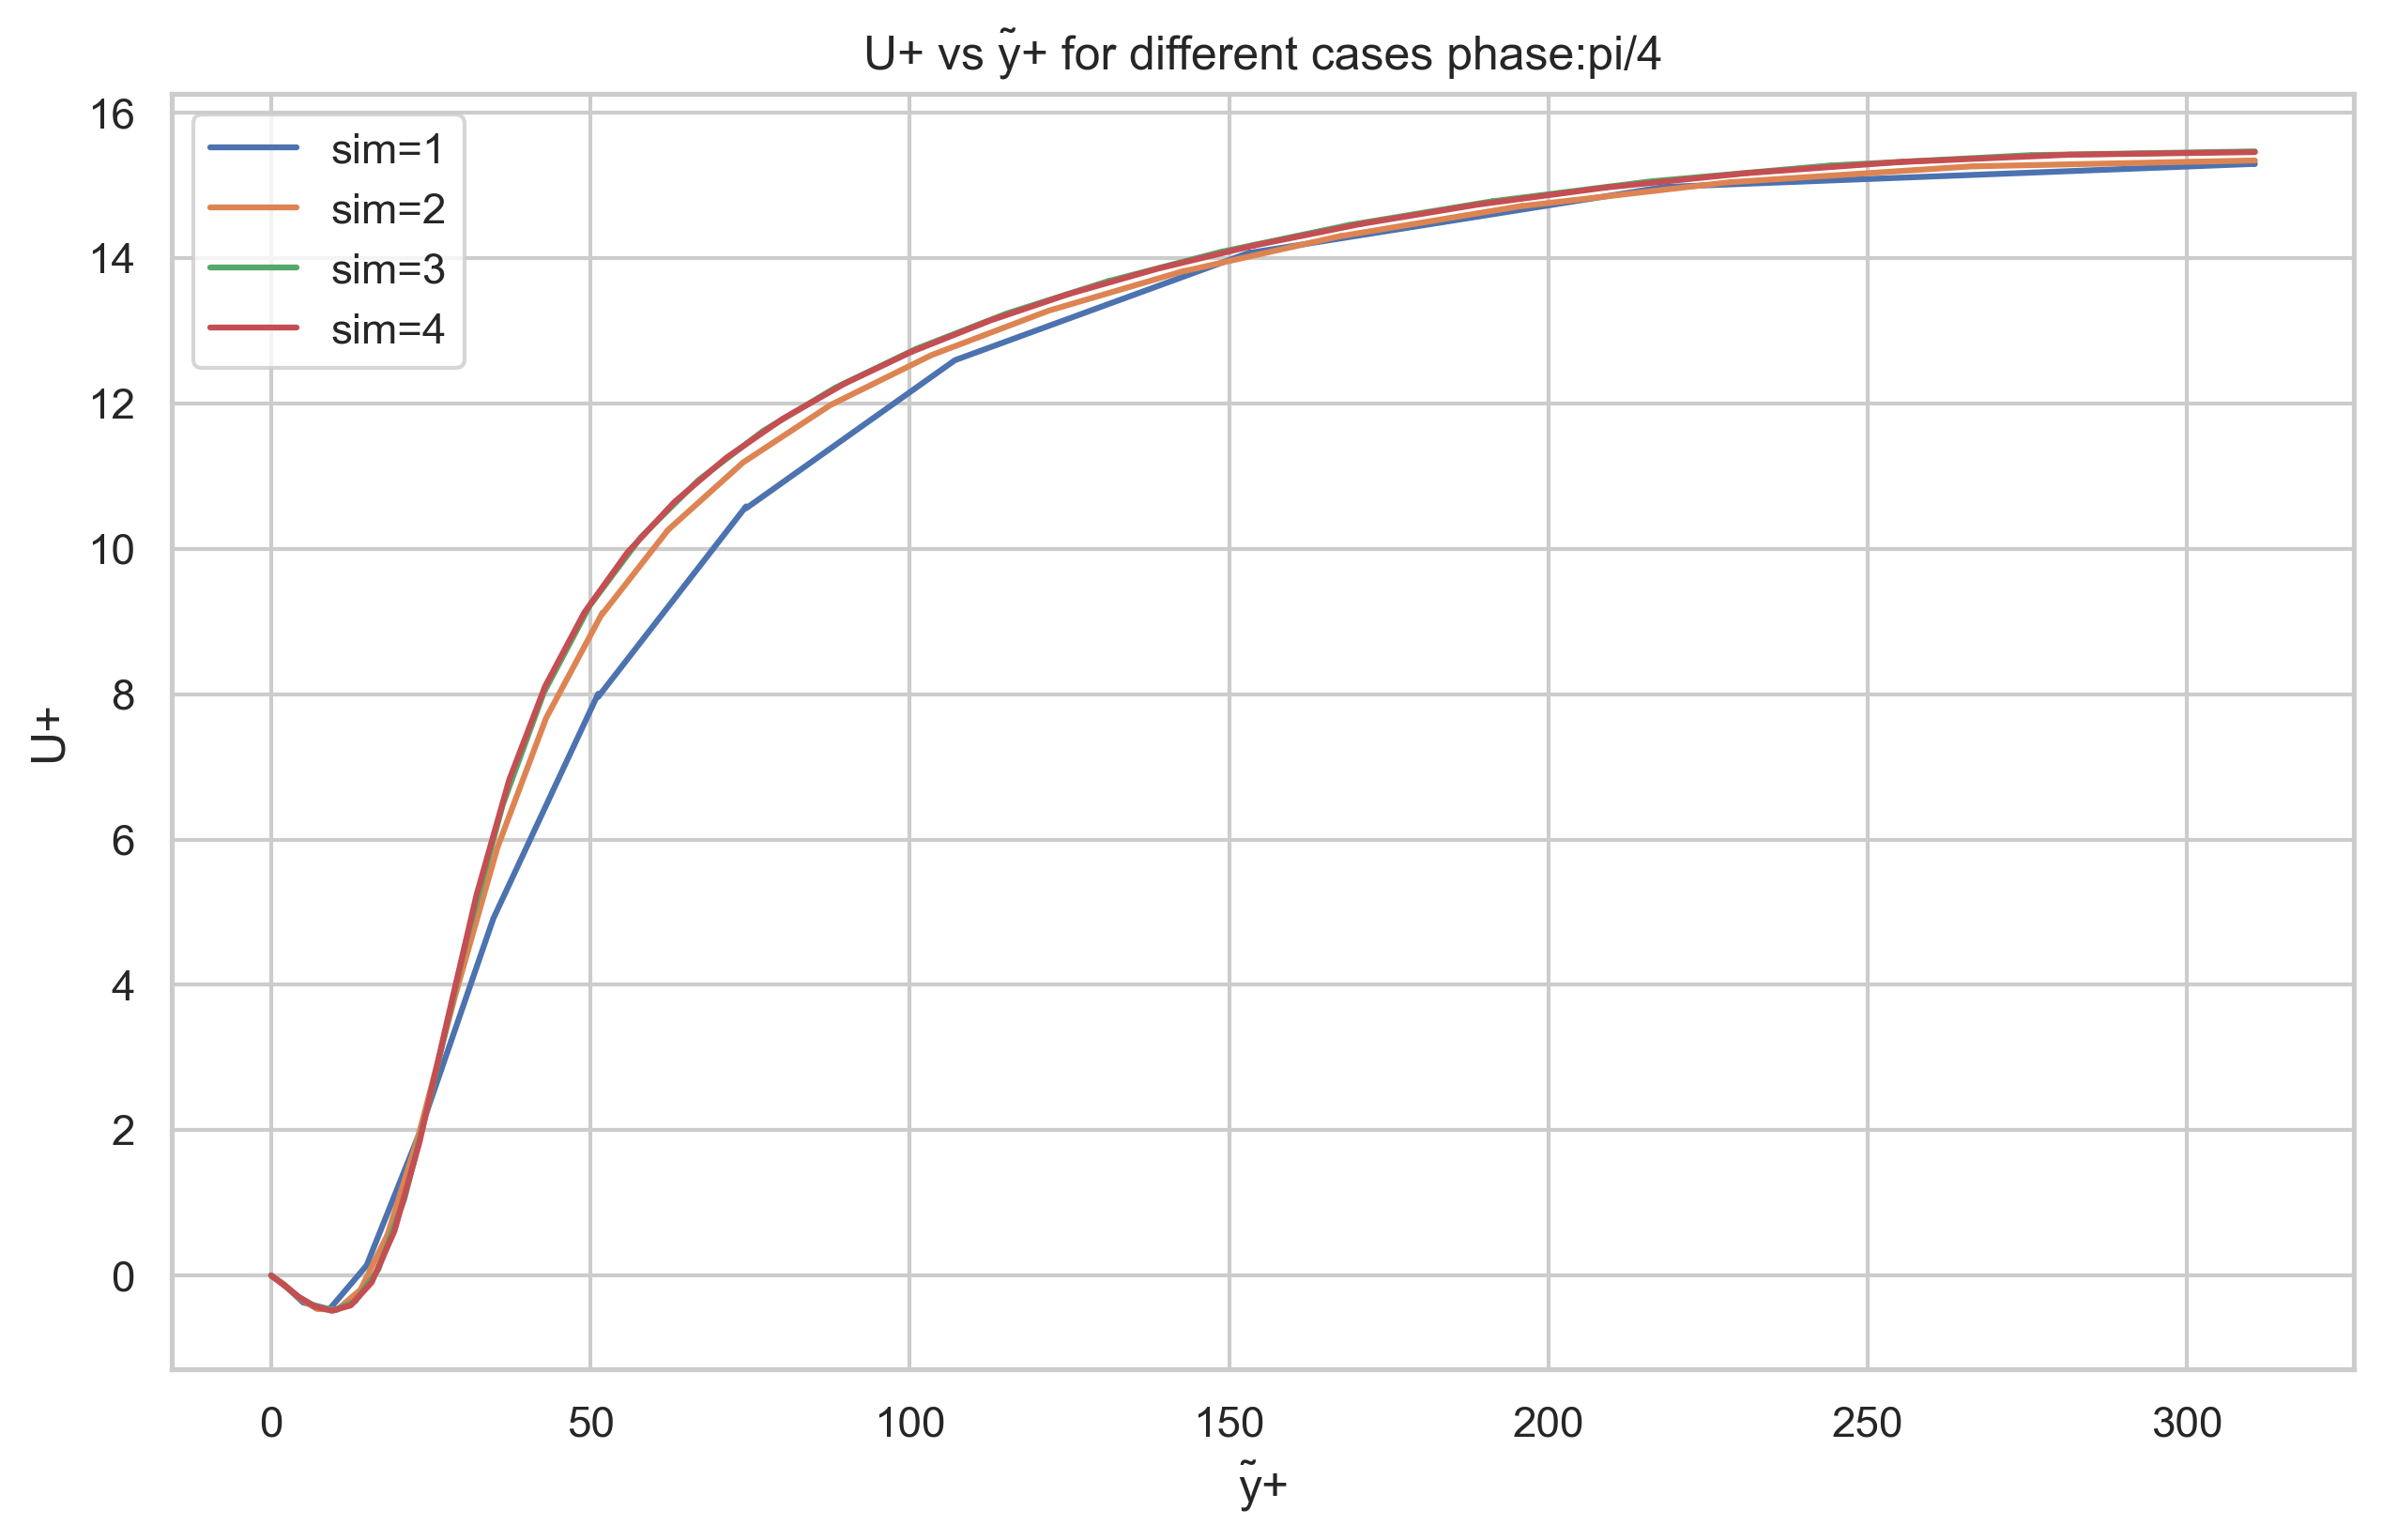

In [122]:
#plotting different phases from the same case
#change sim num 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6), dpi=300)

pi_div=4

for sim_num in [1,2,3,4 ]:  # replace with your parameter sweep
    df = pd.read_csv(f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/csv/avg_profile_wavy_sim_{sim_num}_phase_piby{pi_div}.csv')
    sns.lineplot(data=df, x='y_plus_wavy', y='U_plus', label=f'sim={sim_num}')

plt.title(f'U+ vs y\u0303+ for different cases phase:pi/{pi_div}')
plt.xlabel('y\u0303+')
plt.ylabel('U+')
plt.legend()
plt.grid(True)
plt.savefig(f'U+ vs y\u0303+ for different cases phase piby{pi_div}')
plt.show()


<ipython-input-123-02a63bed2e39>:37: RuntimeWarning: Mean of empty slice
  U_avg = np.nanmean(interpolated_array, axis=0)


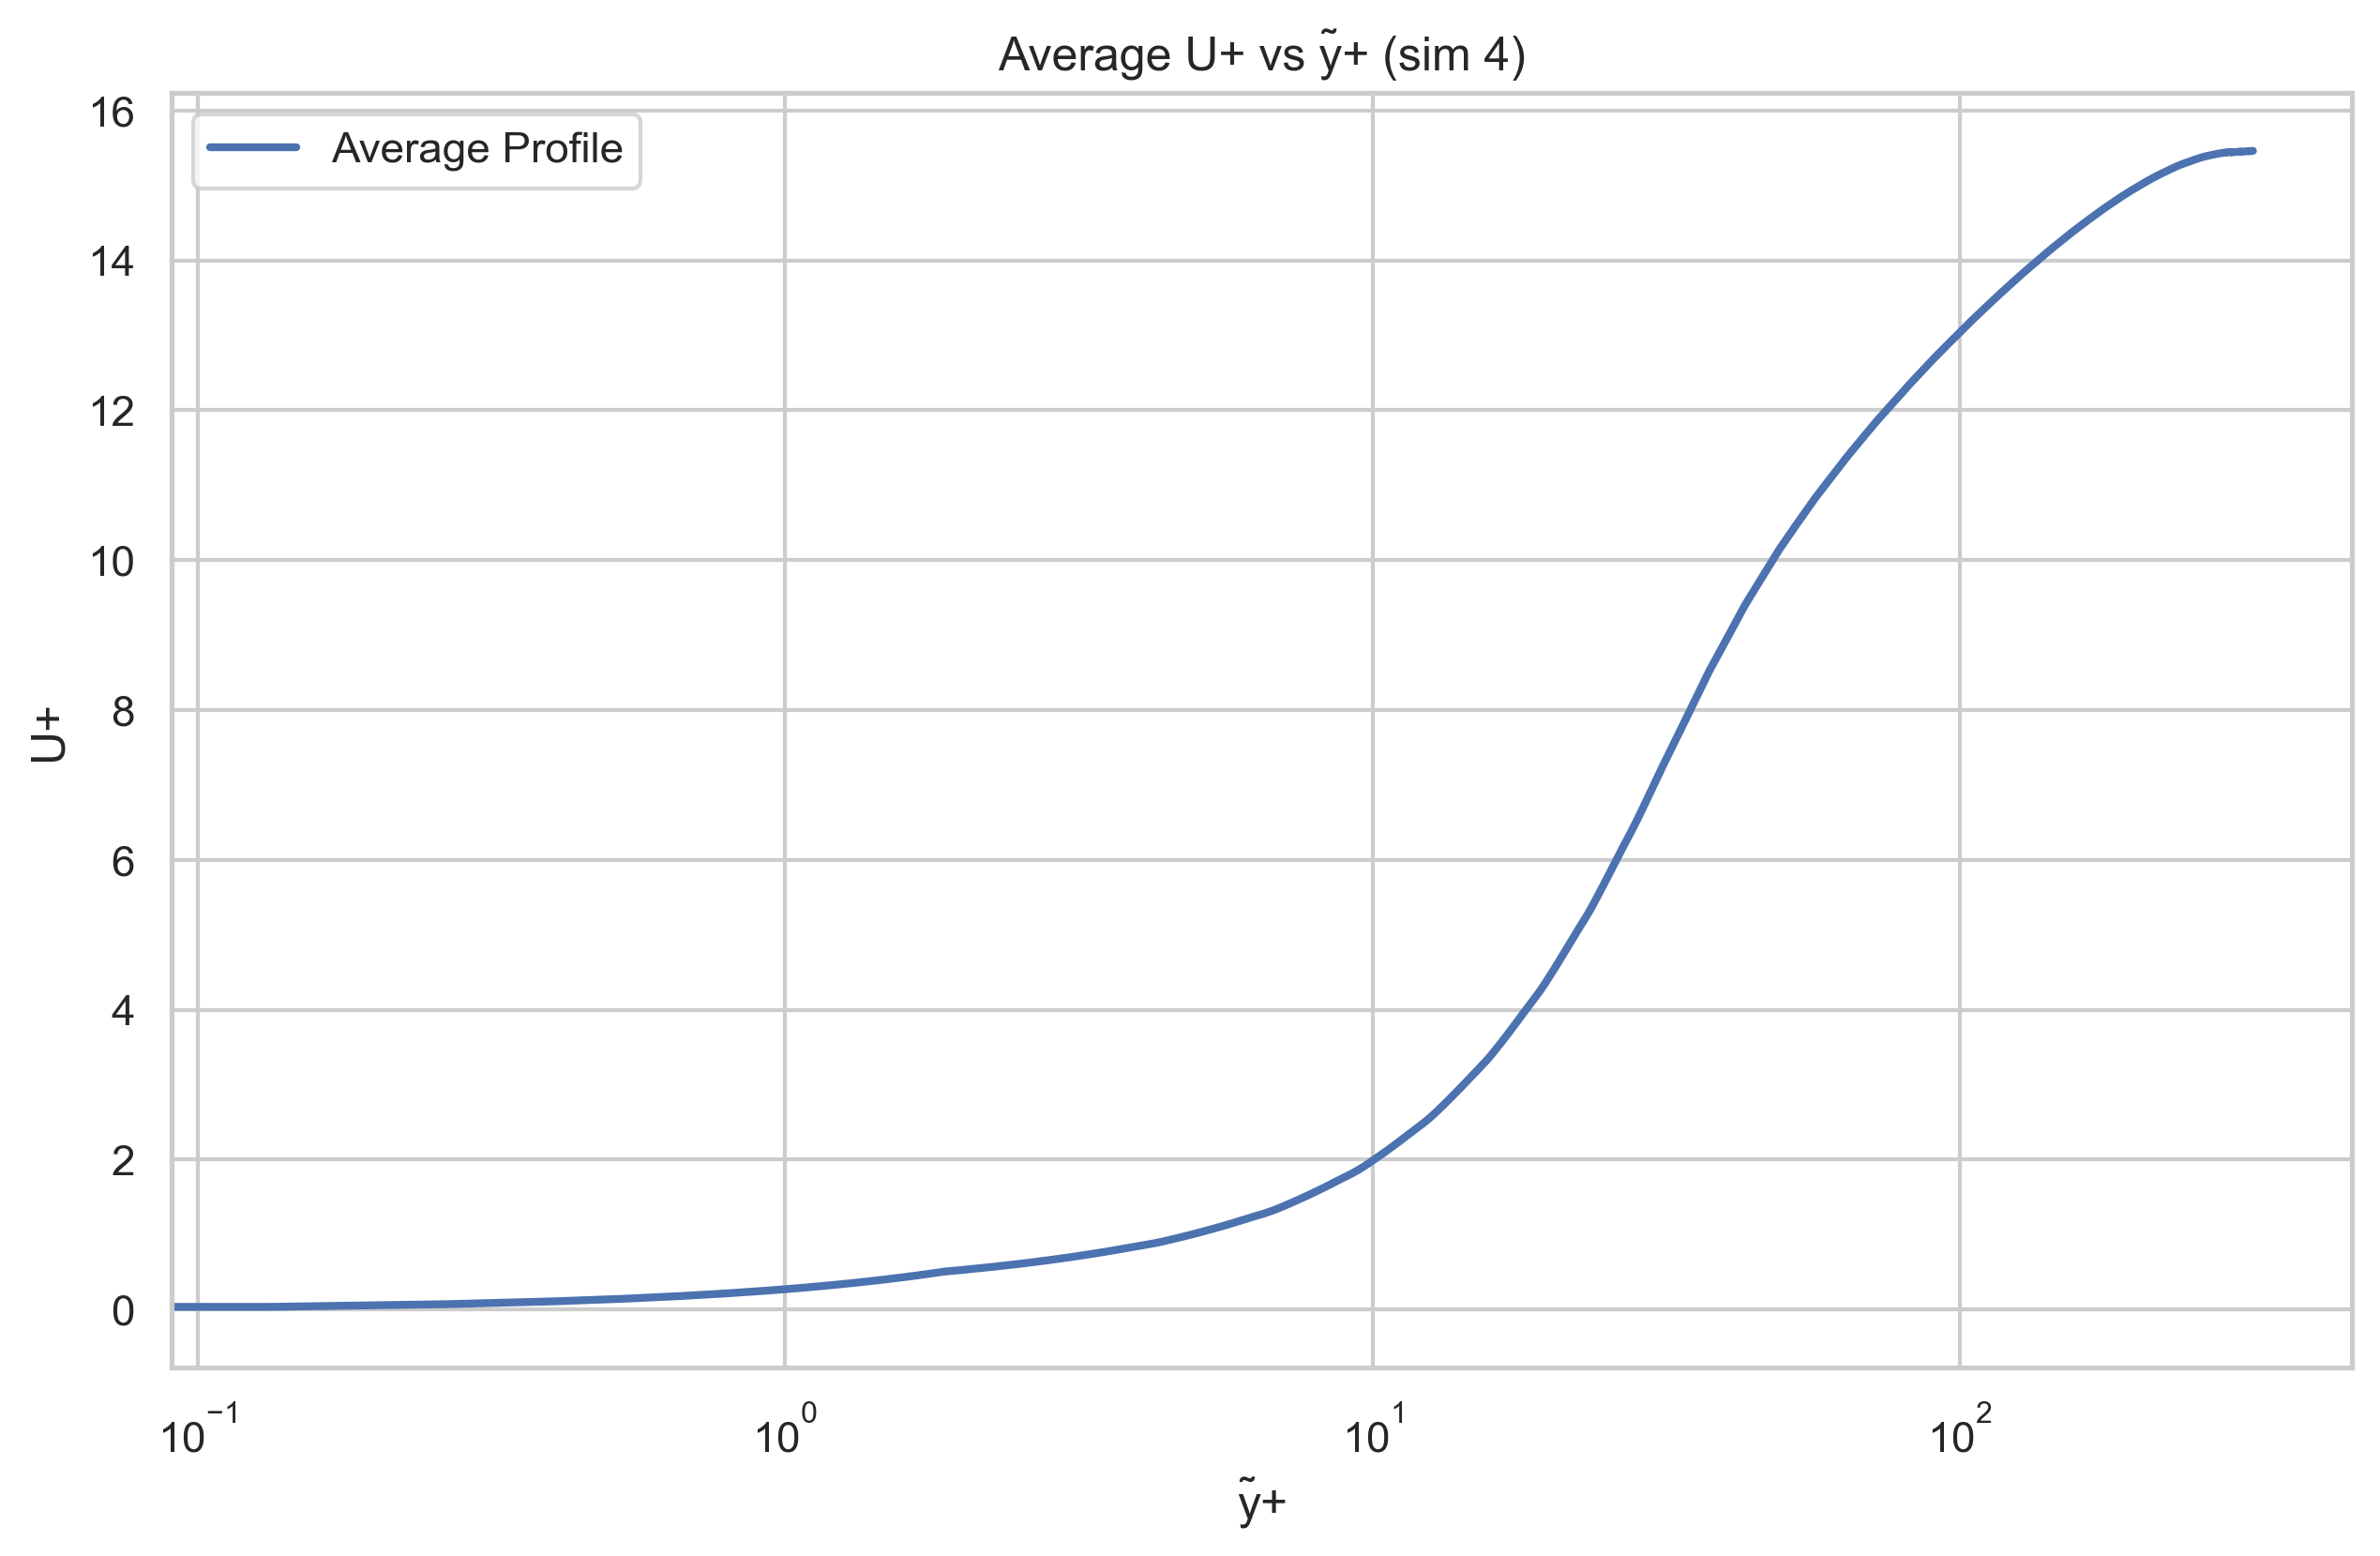

In [123]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

# === Settings ===
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6), dpi=300)

sim_num = 4
pi_div_list = [4, 2, 1.3333333333333333, 1, 0.8, 0.6666666666666666, 0.5714285714285714, 0.5]

# === Step 1: Define common y grid ===
common_y_plus = np.linspace(0, 400, 3000)  # adjust as needed

# === Step 2: Interpolate each dataset to the common grid ===
interpolated_U_plus = []

for pi_div in pi_div_list:
    path = f'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/csv/avg_profile_wavy_sim_{sim_num}_phase_piby{pi_div}.csv'
    df = pd.read_csv(path)

    # Drop NaNs and sort by y for safe interpolation
    df = df.dropna(subset=['y_plus_wavy', 'U_plus']).sort_values('y_plus_wavy')

    # Create interpolation function
    interp_func = interp1d(df['y_plus_wavy'], df['U_plus'], kind='linear',
                           bounds_error=False, fill_value=np.nan)
    
    # Interpolate to common y grid
    U_interp = interp_func(common_y_plus)
    interpolated_U_plus.append(U_interp)

# === Step 3: Convert to DataFrame and compute average (ignoring NaNs) ===
interpolated_array = np.vstack(interpolated_U_plus)  # shape: (8, len(common_y_plus))
U_avg = np.nanmean(interpolated_array, axis=0)

# === Step 4: Plot ===
plt.plot(common_y_plus, U_avg, label='Average Profile', linewidth=2)
plt.title(f'Average U+ vs y\u0303+ (sim {sim_num})')
plt.xscale('log')
plt.xlabel('y\u0303+')
plt.ylabel('U+')
plt.grid(True)
plt.legend()
plt.savefig(f'avg_u+_vs_y_wavy+_sim{sim_num}.png')
plt.show()


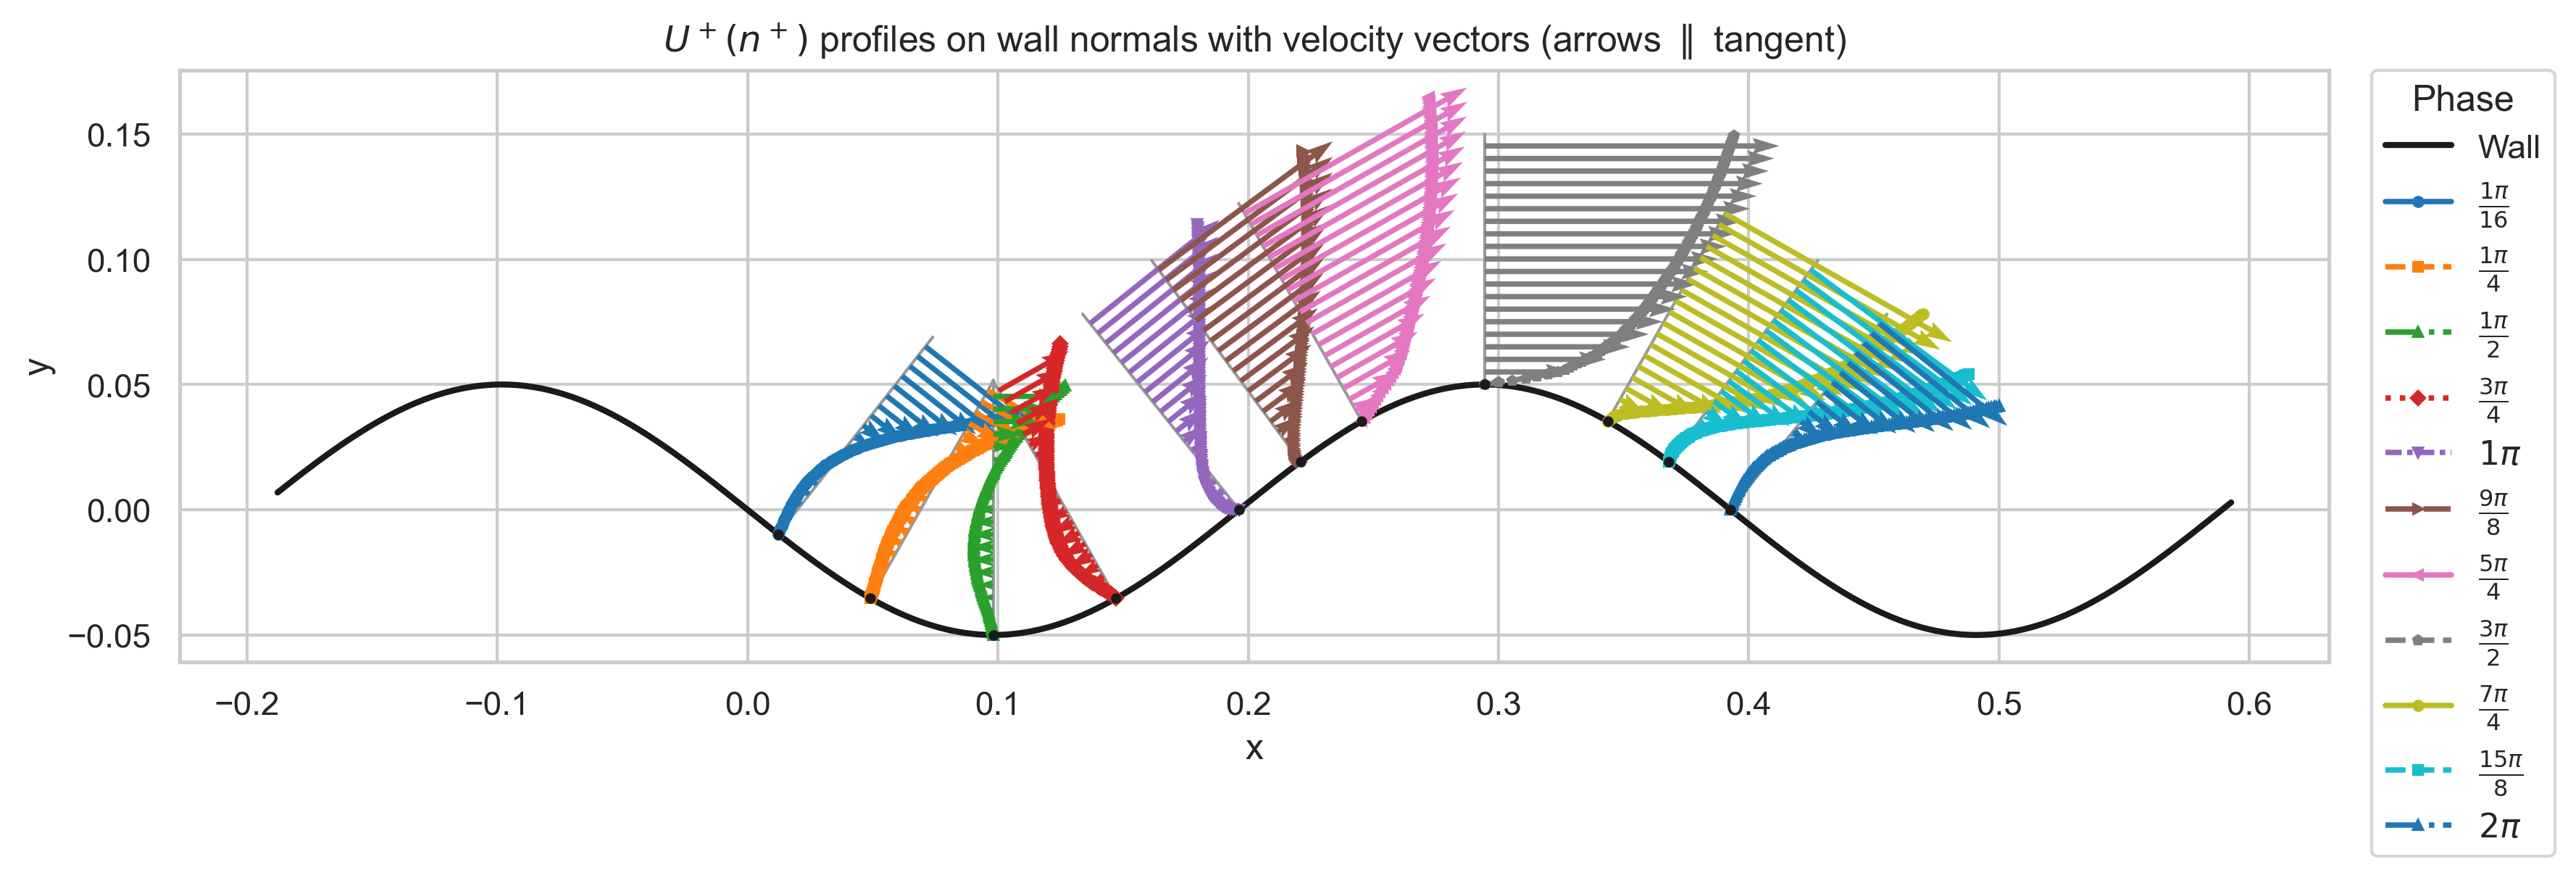

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fractions import Fraction

sns.set(style='whitegrid')

# ----------------- USER SETTINGS -----------------
sim_num = 4
pi_divs = [16, 4, 2, 1.3333333333333333, 1, 0.8888888888888888, 0.8, 0.6666666666666666, 0.5714285714285714, 0.5333333333333333, 0.5]

# CSVs must have columns: n_plus, U_plus  (avg normal profiles per phase)
base = r'C:/Users/Sari Kardosh/OneDrive/Documents/GitHub/sari-data/csv'
path_tpl = base + f'/avg_normal_profile_wavy_sim_{sim_num}_phase_piby' + '{pi_div}.csv'

# Flow parameters
u_tau = 1.0          # friction velocity
nu    = 1/300        # kinematic viscosity

# Display controls
nplus_max_display = 30        # show profiles up to this n+ (wall units)
alpha = 0.01                  # (kept) scale for "leaning" curve, if you still want it
beta  = 0.012                 # NEW: scale for arrow length: arrow_len = beta * U_plus
arrow_stride = 6              # NEW: draw every k-th arrow along the normal
normal_len_plus = 30          # NEW: normal line length in n+ (match nplus_max_display)
linewidth = 1.8
markersize = 3

# ----------------- Wall geometry & helpers -----------------
def y_wall(x):         return -0.05 * np.sin(16.0 * x)
def dy_wall_dx(x):     return -0.8  * np.cos(16.0 * x)

def unit_tangent(x):
    m = dy_wall_dx(x)
    tx, ty = 1.0, m
    s = np.hypot(tx, ty)
    return tx/s, ty/s

def unit_normal_into_fluid(x):
    m = dy_wall_dx(x)
    nx, ny = -m, 1.0
    s = np.hypot(nx, ny)
    return nx/s, ny/s

def phase_label(pi_div):
    frac = Fraction(1/pi_div).limit_denominator()
    return f"${frac.numerator}\\pi$" if frac.denominator == 1 else f"$\\frac{{{frac.numerator}\\pi}}{{{frac.denominator}}}$"

def x0_from_phase(pi_div):
    theta = np.pi / pi_div        # phase angle
    return theta / 16.0           # because wall arg is 16*x

# ----------------- Build projected profiles -----------------
profiles = []
x0_list  = []

for pi_div in pi_divs:
    path = path_tpl.format(pi_div=pi_div)
    df = pd.read_csv(path).dropna(subset=['n_plus', 'U_plus']).copy()

    # limit extent
    if nplus_max_display is not None:
        df = df[df['n_plus'] <= nplus_max_display].reset_index(drop=True)

    # wall base & local frame
    x0 = x0_from_phase(pi_div)
    y0 = y_wall(x0)
    nx, ny = unit_normal_into_fluid(x0)
    tx, ty = unit_tangent(x0)

    # n+ -> normal distance
    n_plus = df['n_plus'].to_numpy()
    s      = n_plus * (nu / u_tau)              # meters (or domain units)
    up     = df['U_plus'].to_numpy()

    # 1) "leaning profile" curve (optional—kept from your version)
    x_curve = x0 + s*nx + alpha*up*tx
    y_curve = y0 + s*ny + alpha*up*ty

    # 2) pure normal line geometry (no velocity influence)
    n_plus_norm = np.linspace(0, normal_len_plus, 100)
    s_norm = n_plus_norm * (nu / u_tau)
    x_norm = x0 + s_norm*nx
    y_norm = y0 + s_norm*ny

    # 3) arrow bases on the normal line and arrow vectors along tangent ∝ U_plus
    #    - arrows start ON the normal line at sample points (subset by stride)
    #    - arrow components in (x,y) = beta * U_plus * (tx, ty)
    idx = np.arange(0, len(n_plus), arrow_stride)
    x_arrow_base = x0 + s[idx]*nx
    y_arrow_base = y0 + s[idx]*ny
    u_arrow = beta * up[idx] * tx
    v_arrow = beta * up[idx] * ty

    profiles.append({
        'label': phase_label(pi_div),
        'x0': x0,
        'x_curve': x_curve, 'y_curve': y_curve,     # leaning curve (optional)
        'x_norm': x_norm,   'y_norm': y_norm,       # straight normal line
        'xq': x_arrow_base, 'yq': y_arrow_base,     # quiver bases
        'uq': u_arrow,      'vq': v_arrow           # quiver vectors
    })
    x0_list.append(x0)

# ----------------- Plot wall + profiles + normals + velocity vectors -----------------
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

# wall span to cover all bases
x_min = min(x0_list) - 0.2
x_max = max(x0_list) + 0.2
xw = np.linspace(x_min, x_max, 1200)
ax.plot(xw, y_wall(xw), color='k', lw=2, label='Wall')

# styles
linestyles = ['-', '--', '-.', ':', (0,(3,1,1,1)), (0,(5,2)), '-', '--']
markers    = ['o', 's', '^', 'D', 'v', '>', '<', 'p']
colors     = plt.cm.tab10.colors  # a small qualitative palette

for i, prof in enumerate(profiles):
    color = colors[i % len(colors)]

    # (A) draw the straight normal line (thin, gray)
    ax.plot(prof['x_norm'], prof['y_norm'], color='0.6', lw=1.0, zorder=1)

    # (B) draw the "leaning" velocity profile curve (optional)
    ax.plot(prof['x_curve'], prof['y_curve'],
            linestyle=linestyles[i % len(linestyles)],
            marker=markers[i % len(markers)],
            ms=markersize, lw=linewidth, color=color, label=prof['label'], zorder=2)

    # (C) draw velocity vectors coming out of the normal line (along tangent)
    ax.quiver(prof['xq'], prof['yq'], prof['uq'], prof['vq'],
              angles='xy', scale_units='xy', scale=1.0, color=color, width=0.0025, zorder=3)

    # base point on wall
    ax.plot([prof['x0']], [y_wall(prof['x0'])], 'k.', ms=5, zorder=4)

ax.set_aspect('equal', adjustable='box')           # preserves true geometry
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'$U^+(n^+)$ profiles on wall normals with velocity vectors (arrows $\parallel$ tangent)')
ax.grid(True)
ax.legend(title='Phase', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.savefig(f'profiles_on_wavywall_with_vectors_sim{sim_num}.png', bbox_inches='tight', dpi=300)
plt.show()

